<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Regressão Linear Múltipla

## Hands-On: Diagnóstico do Modelo - Análise dos Resíduos

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels as sms
import statsmodels.api as sm

### Importação da base de dados

In [2]:
df = pd.read_csv('base_funcionarios_v4.csv', 
                 sep=',', 
                 index_col=0)
df.shape

(46, 5)

In [3]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
0,5517.4,3,3,9.777079,Não
1,6399.9,4,6,3.765998,Não
2,6206.7,6,3,7.926264,Não
3,6060.6,4,5,2.233497,Não
4,6122.7,2,9,26.821842,Não


### Análise Exploratória dos Dados

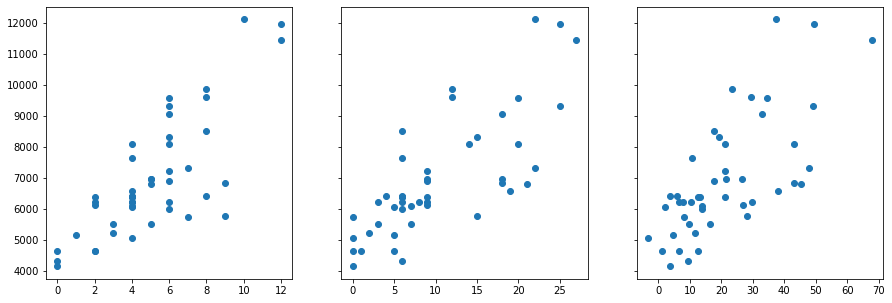

In [4]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(df['Anos_Educ_Superior'],df['Salario']);
ax2.scatter(df['Tempo_Empresa'],df['Salario']);
ax3.scatter(df['Tempo_de_Carreira'],df['Salario']);

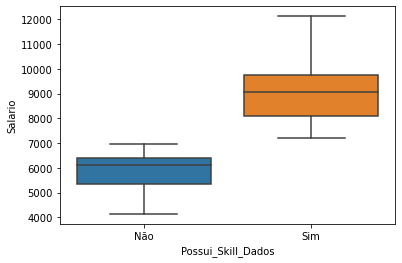

In [5]:
sns.boxplot(x=df['Possui_Skill_Dados'], y=df['Salario']);

Como a distribuição entre quem tem e não tem skill de dados é tão diferente, é praticamente certo que essa variável contribuirá para que o modelo explique ainda mais a variabilidade da variável salário, ou seja, aumente o R². **Na prática**: as estimativas realizadas pelo modelo serão ainda melhores.

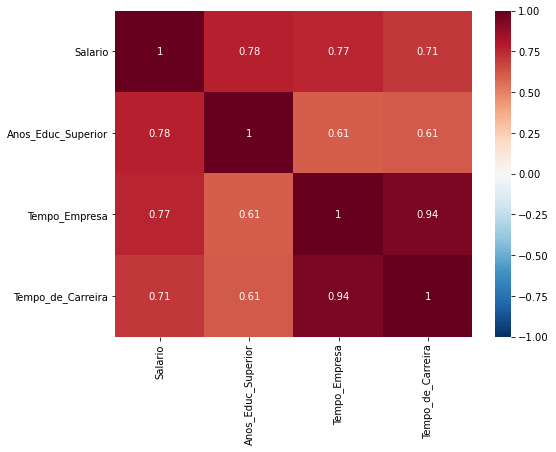

In [6]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

### Preparação dos Dados

#### Criando variáveis Dummy

In [7]:
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
39,8082.2,4,20,43.252417,Sim
25,4645.9,0,5,12.640970,Não
26,5736.9,7,0,8.222066,Não
44,6235.4,4,6,6.578993,Não
35,9857.1,8,12,23.448417,Sim


In [8]:
# 1a Forma: Usando get_dummies()
df2 = pd.get_dummies(df, drop_first=True)
df2.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,1
25,4645.9,0,5,12.640970,0
26,5736.9,7,0,8.222066,0
44,6235.4,4,6,6.578993,0
35,9857.1,8,12,23.448417,1


In [9]:
# 2a Forma: Usando np.where()
df3 = df.copy() # Copia o dataframe
df3['Possui_Skill_Dados_Sim'] = np.where(df['Possui_Skill_Dados'] == 'Sim', 1, 0) # Essa função é análoga à função SE() do Excel
df3.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,Sim,1
25,4645.9,0,5,12.640970,Não,0
26,5736.9,7,0,8.222066,Não,0
44,6235.4,4,6,6.578993,Não,0
35,9857.1,8,12,23.448417,Sim,1


In [10]:
# 3a Forma: Usando map()
# Criação do De/Para a ser usado com a função .map()
de_para = {'Sim': 1, 'Não': 0} 

df4 = df.copy() # Copia o dataframe
df4['Possui_Skill_Dados_Sim'] = df['Possui_Skill_Dados'].map(de_para)
df4.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,Sim,1
25,4645.9,0,5,12.640970,Não,0
26,5736.9,7,0,8.222066,Não,0
44,6235.4,4,6,6.578993,Não,0
35,9857.1,8,12,23.448417,Sim,1


### Ajuste do Modelo de Regressão usando o Statsmodels (Pacote de Modelos Estatísticos)

In [11]:
df2.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Sim
0,5517.4,3,3,9.777079,0
1,6399.9,4,6,3.765998,0
2,6206.7,6,3,7.926264,0
3,6060.6,4,5,2.233497,0
4,6122.7,2,9,26.821842,0


In [12]:
# Variável resposta
y = df2['Salario']

# Variáveis explicativas
df2['intercepto'] = 1 

x = df2[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Tempo_de_Carreira',
         'Possui_Skill_Dados_Sim']]

In [13]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     66.10
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.49e-17
Time:                        09:53:41   Log-Likelihood:                -366.46
No. Observations:                  46   AIC:                             742.9
Df Residuals:                      41   BIC:                             752.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercepto              4405

Como identificamos um problema de multicolinearidade, e o coeficiente da variável "Tempo_de_Carreira" apresentou-se estatisticamente igual a zero, vamos excluí-la do modelo.

As informações contidas na variável "Tempo_de_Carreira" já estão representadas na variável "Tempo_Empresa".

In [14]:
# Variável resposta
y = df2['Salario']

# Variáveis explicativas
df2['intercepto'] = 1 

x = df2[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Possui_Skill_Dados_Sim']]

In [15]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     87.90
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           3.87e-18
Time:                        09:53:41   Log-Likelihood:                -366.99
No. Observations:                  46   AIC:                             742.0
Df Residuals:                      42   BIC:                             749.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercepto              4412

### Equação do modelo

Salário = $\beta_0$ + $\beta_1$ x Anos Educação Superior + $\beta_2$ x Tempo Empresa + $\beta_3$ x Possui Skill Dados (Sim)

### Diagnóstico do Modelo: Análise dos Resíduos

In [16]:
def grafico_residuos(resultado):
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())
    
    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1
    
    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1
    
    resid_graf.set(ylim=(ymin, ymax))
    
    ax1 = resid_graf.axes
    ax1.axhline( 0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    plt.show()

In [17]:
len(df.index)*0.05

2.3000000000000003

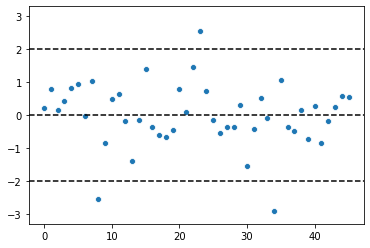

In [18]:
grafico_residuos(resultado)

#### Normalidade dos Resíduos

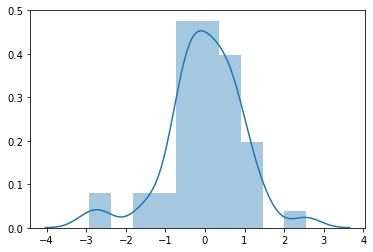

In [19]:
# Construção de histograma para avaliar a distribuição dos resíduos
sns.distplot(resultado.resid_pearson);

In [20]:
# Realização de Teste de Hipóteses para avaliar Normalidade
from scipy.stats import shapiro
normalidade = shapiro(resultado.resid_pearson)
print('Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))

Estatística=0.951, p-valor=0.054



#### Homocedasticidade dos Resíduos

In [21]:
from statsmodels.stats.diagnostic import het_white
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [22]:
white_test = het_white(resultado.resid_pearson,
                       resultado.model.exog)

In [23]:
print(dict(zip(labels, white_test)))

{'LM Statistic': 11.715298949479557, 'LM-Test p-value': 0.16436570335976206, 'F-Statistic': 1.5803917193707147, 'F-Test p-value': 0.16425024727281154}


### Interpretação do Modelo

**Intercepto ou $\beta_0$**: Salário médio de um colaborador sem educação superior, recém chegado na empresa e sem skills de dados é de `R$4.412,54`.<br>
**$\beta_1$** x Anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa e possui skill de dados constantes, gera um aumento médio de `R$247,89`.<br>
**$\beta_2$** x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior e possui skill de dados constantes, gera um aumento médio de `R$67,26`.<br>
**$\beta_3$** x Possui Skill de Dados: Adquirir skills de dados, mantendo os anos de educação superior e tempo de empresa constantes, gera um aumento médio de `R$1.861,78`.